In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
from keras.callbacks import ModelCheckpoint

In [2]:
from keras.applications.resnet import ResNet50
from tensorflow.keras.applications.resnet import preprocess_input

In [3]:
os.chdir(r'C:\Users\ARYAN\OneDrive\Desktop\Apple disease\apple_dataset')

In [4]:
train_path =pd.read_csv(r"C:\Users\ARYAN\OneDrive\Desktop\Apple disease\apple_dataset\train.csv")
test_path = pd.read_csv(r"C:\Users\ARYAN\OneDrive\Desktop\Apple disease\apple_dataset\test.csv")

In [5]:
# Train data
df = pd.read_csv(r'C:\Users\ARYAN\OneDrive\Desktop\Apple disease\apple_dataset\train.csv')
df['label'] = df[['healthy', 'multiple_diseases', 'rust', 'scab']].idxmax(axis=1)
df['filename'] = "C:/Users/ARYAN/OneDrive/Desktop/Apple disease/apple_dataset/images/" + df['image_id'] + '.jpg'

# Test data
test_df = pd.read_csv(r'C:\Users\ARYAN\OneDrive\Desktop\Apple disease\apple_dataset\test.csv')
test_df['filename'] = "C:/Users/ARYAN/OneDrive/Desktop/Apple disease/apple_dataset/images/" + test_df['image_id'] + '.jpg'


In [6]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet.preprocess_input) \
  .flow_from_dataframe(dataframe=df, directory=None, x_col='filename', y_col='label',
                       target_size=(224,224), classes=['healthy', 'multiple_diseases', 'rust', 'scab'],
                       batch_size=32, class_mode='categorical')

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet.preprocess_input) \
  .flow_from_dataframe(dataframe=test_df, directory=None, x_col='filename', y_col=None,
                       target_size=(224,224), classes=['healthy', 'multiple_diseases', 'rust', 'scab'],
                       batch_size=32, shuffle=False, class_mode=None)


Found 1821 validated image filenames belonging to 4 classes.
Found 1821 validated image filenames.


C:\Users\ARYAN\AppData\Roaming\Python\Python312\site-packages\keras\src\legacy\preprocessing\image.py:854: UserWarning: `classes` will be ignored given the class_mode="None"
  warnings.warn(


In [7]:
imgs, labels = next(train_batches)

In [8]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-95.68..112.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-101.939..137.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-106.68..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-105.68..140.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-104.68..151.061].


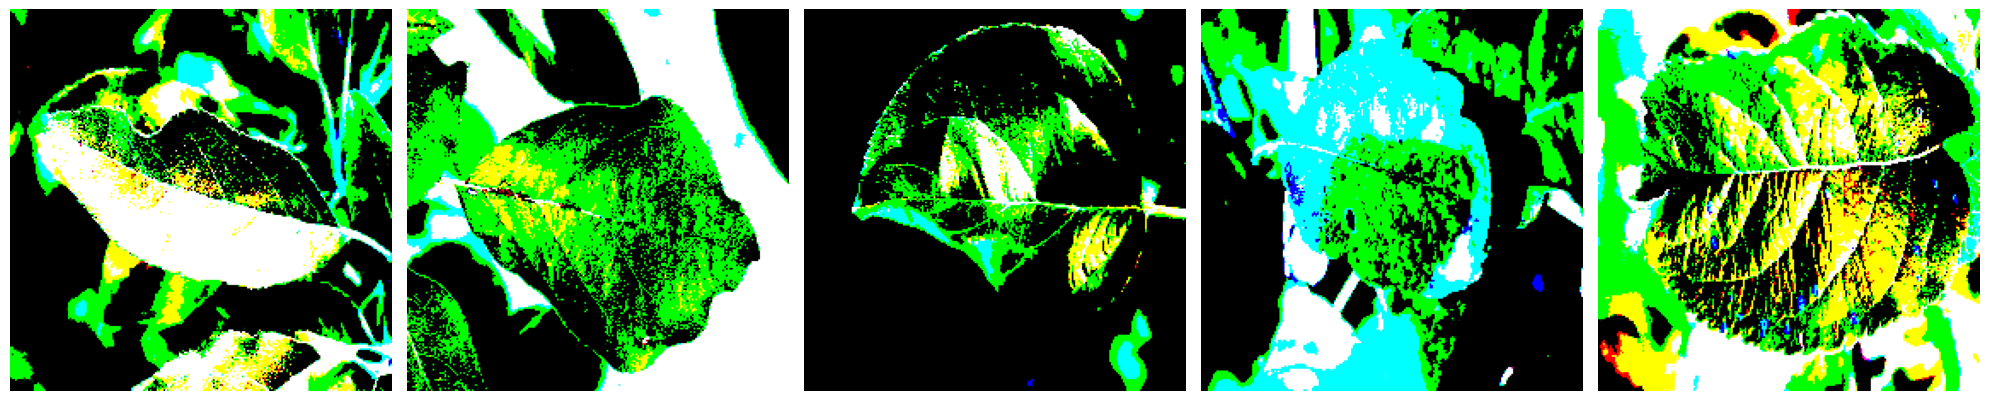

[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [9]:
plotImages(imgs)
print(labels)

In [ ]:
# Step 1: Imports
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_class_weight

# Step 2: Load and preprocess CSV
df = pd.read_csv(r'C:/Users/ARYAN/OneDrive/Desktop/Apple disease/apple_dataset/train.csv')
df['label'] = df[['healthy', 'multiple_diseases', 'rust', 'scab']].idxmax(axis=1)
df['filename'] = "C:/Users/ARYAN/OneDrive/Desktop/Apple disease/apple_dataset/images/" + df['image_id'] + '.jpg'

# Encode class labels
label_list = df['label'].unique().tolist()
label_to_index = {label: idx for idx, label in enumerate(label_list)}
df['label'] = df['label'].map(label_to_index)

# Step 3: Split into train and validation
train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)

# Step 4: Data Augmentation and Preprocessing Function
datagen = ImageDataGenerator(
    rotation_range=40,
    zoom_range=0.3,
    width_shift_range=0.3,
    height_shift_range=0.3,
    horizontal_flip=True,
    brightness_range=[0.6, 1.4],
    shear_range=0.2,
    fill_mode='nearest',
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input
)

def load_dataset(df, batch_size=32):
    file_paths = df['filename'].values
    labels = df['label'].values
    ds = tf.data.Dataset.from_tensor_slices((file_paths, labels))

    def process_path(file_path, label):
        image = tf.io.read_file(file_path)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, [224, 224])
        image = image / 255.0
        label = tf.one_hot(label, depth=len(label_list))
        return image, label

    ds = ds.map(process_path, num_parallel_calls=tf.data.AUTOTUNE)
    return ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)

train_ds = load_dataset(train_df)
val_ds = load_dataset(val_df)

# Step 5: Build Custom CNN Model
model = Sequential()

# First convolution block
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

# Second convolution block
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Third convolution block
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output and add dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Increased dropout for better regularization
model.add(Dense(len(label_list), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

# Step 6: Compute class weights to handle imbalanced dataset
class_weights = compute_class_weight('balanced', classes=np.unique(df['label']), y=df['label'])
class_weights = dict(enumerate(class_weights))

# Step 7: Set up Callbacks for Training
checkpoint_path = "apple_leaf_custom_cnn.keras"
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
lr_schedule = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6, verbose=1)

callbacks = [checkpoint, early_stop, lr_schedule]

# Step 8: Train the Model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,  # Less epochs, but using techniques to improve performance
    class_weight=class_weights,
    callbacks=callbacks
)

# Step 9: Load Best Weights and Evaluate Model
model.load_weights(checkpoint_path)
val_loss, val_acc = model.evaluate(val_ds)
print(f"\n✅ Final Validation Accuracy: {val_acc * 100:.2f}%")


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,113,284 (91.98 MB)

 Trainable params: 525,572 (2.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/15


C:\Users\ARYAN\AppData\Roaming\Python\Python312\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_56']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4571 - loss: 1.5690
Epoch 1: val_accuracy improved from -inf to 0.73425, saving model to apple_leaf_resnet50.keras
46/46 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.4590 - loss: 1.5643 - val_accuracy: 0.7342 - val_loss: 0.7038 - learning_rate: 0.0010
Epoch 2/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7312 - loss: 0.8203
Epoch 2: val_accuracy improved from 0.73425 to 0.83836, saving model to apple_leaf_resnet50.keras
46/46 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.7311 - loss: 0.8197 - val_accuracy: 0.8384 - val_loss: 0.5019 - learning_rate: 0.0010
Epoch 3/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7871 - loss: 0.6985
Epoch 3: val_accuracy did not improve from 0.83836
46/46 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.7869 - loss: 0.6974 - val_accuracy: 0.7425 - val_loss: 0.5856 - learning_rate: 0.0010
Epoch 4/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 45s/step - accuracy: 0.8280 - loss: 0.5502 
Epoch 4: val_acc

C:\Users\ARYAN\AppData\Roaming\Python\Python312\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_56']
Received: inputs=Tensor(shape=(32, 224, 224, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step

Classification Report:

                   precision    recall  f1-score   support

             scab       0.87      0.93      0.90       119
multiple_diseases       0.64      0.50      0.56        18
          healthy       0.89      0.88      0.89       103
             rust       0.94      0.91      0.93       125

         accuracy                           0.89       365
        macro avg       0.84      0.81      0.82       365
     weighted avg       0.89      0.89      0.89       365

